# Part II - Ford GoBike System Data
## by Darine Battikh

## Investigation Overview
> This presentation aims at featuring the main conclusion of the exploratory analysis. Although the exploration part has treated thoroughly many variables, this presentation will highlight the interesting insights and conclusions.

> This investigation will focus on the trip duration and factors that can affect it, mainly, user type, days, members' gender, and members' age.

## Dataset Overview

> Ford GoBike is a bike sharing system located and covering the San FranciscoBay area. It provides more than 4,000 bikes distributed across different accessible locations allowing customers to get bikes from one station and return to any other station in the system, making them ideal, accessible, and convenient for one-way trips, for special and urgent occasions. The bikes are available for use 24 hours/day, all days of the week, and all days of the year. Customers have the possibility to become subscribers through a monthly or yearly subscriptions or simply purchase one ride for a determined number of hours. 

> The Ford GoBike System Data is a dataframe was compoed of 16 columns and 183412 entries and requires some cleaning operations. The dataframe has different data types like objects, integers (64), and float64.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
df = pd.read_csv('df_clean.csv')

In [5]:
color = sb.color_palette('pastel')
color

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

## Trip Duration and Daily Usage

> On average, the most of trips last 10 minutes and the majority of rides take between 3 minutes and 30 minutes.

> Most of rides are taken on Tuesday and Thursday, yet, longer rides are made on the weekends.

In [6]:
def create_plot(data, x, order, title, xlabel, ylabel, isSubplot, sp1=1, sp2=2, sp3=1, y=None, withRotation=False, plotType='countPlot', height=None,) :
    #Histogramme on the left about the name of the start location
    if isSubplot :
        plt.subplot(sp1,sp2,sp3)
    sb.countplot(data=data, x=x, color=color[0], order=order, y=y)
    if withRotation :
        plt.xticks(rotation = 90); 
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
def create_pie_plot(data, order, title, labels, colors) :
    plt.pie(order, labels =labels, colors = colors , startangle = 90, counterclock = False, autopct='%.0f%%', radius = 10);
    plt.title(title, size = 15)
    plt.axis('square');  

def create_bar_plot(x, height, colors, xlabel, ylabel, title) :
    plt.bar(x=x, height=height, color=colors);
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show();
    
def create_histogramme (data, x, bins, color, title, xlabel, ylabel):
    plt.hist(data = data, x = x, bins = bins, color = color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show();

In [7]:
df['duration_minute'] = df['duration_sec']/60

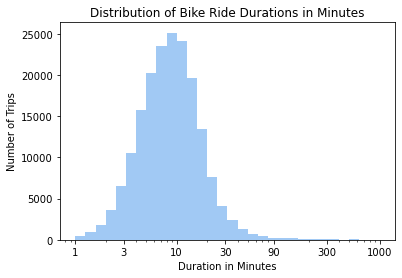

In [8]:
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
xlabel =  [ 1 , 3, 10, 30, 90, 300, 1000]
labels = ['{}'.format(i) for i in xlabel]
plt.xscale('log');
plt.xticks(xlabel,labels);
create_histogramme (data = df, x = 'duration_minute', bins = bins, color = color[0], title = 'Distribution of Bike Ride Durations in Minutes', xlabel ='Duration in Minutes', ylabel = 'Number of Trips')

Based on the histogram of the Trip Duration in Minutes, we can state the following:
* Nearly 25000 bike rides lasted 10 minutes.
* The majority of bike trips last between 3 minutes and 30 minutes. 
* Half of the bike trips last less than 10 minutes.

In [9]:
#import datetime package to use to create a new dates columns
import datetime as dt

In [10]:
stt_date = df.start_time.str.split(" ", n = 1, expand = True)
df['stt_date'] = stt_date[0]
days= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
day = []
for i in df.stt_date:
    day.append(days[dt.datetime.strptime(i, '%Y-%m-%d').weekday()])

df['stt_day'] = day

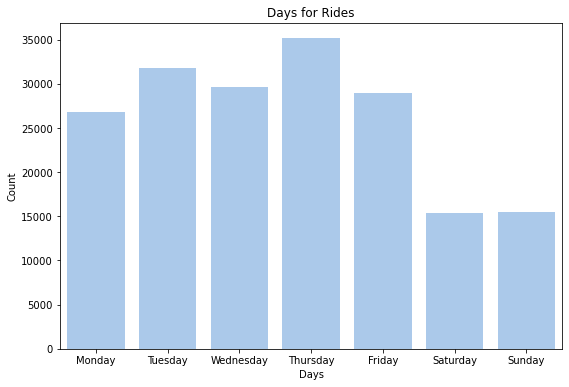

In [19]:
order =  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(9,6))
create_plot(data = df, x = 'stt_day', order = order, title = 'Days for Rides', xlabel = 'Days', ylabel = 'Count', isSubplot = False, sp1=1, sp2=2, sp3=1, y=None, withRotation=False, plotType='countPlot', height=None)

This histogram shows that most members use the bikes on weekdays with two peaks on Tuesday and Thursday which is in accordance to the dates extracted from the previous bar chart.

# User Types and Their Service Usage

> The Bike users are distributed as follows: 
>> * 89% are subscribers
>> * 11% are customers

> For the service, the usage among user types is different: 
>> * Subscribers' service use is consistent over all days, with a slight increase for the weekdays.
>> * Customers, in contrast, have a heavy use of bikes on weekends and decrease on the rest of the weekdays. 

> Also, customers tend to have longer rides than subscribers

> This can be explained b the fact that customers are using the service for leisure and enjoyable trips, whereas, subscribers rely on the service for their daily actitivities (work, school, etc).

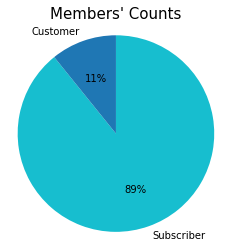

In [23]:
base_color = ['tab:cyan', 'tab:blue']
sorted_type = df['user_type'].value_counts()
create_pie_plot(labels = sorted_type.index, title="Members' Counts", data=df, order=sorted_type,colors = base_color) 

The pie chart illustrates that 89% of the members of GoBike are subscribers compared to only 11% of customers.

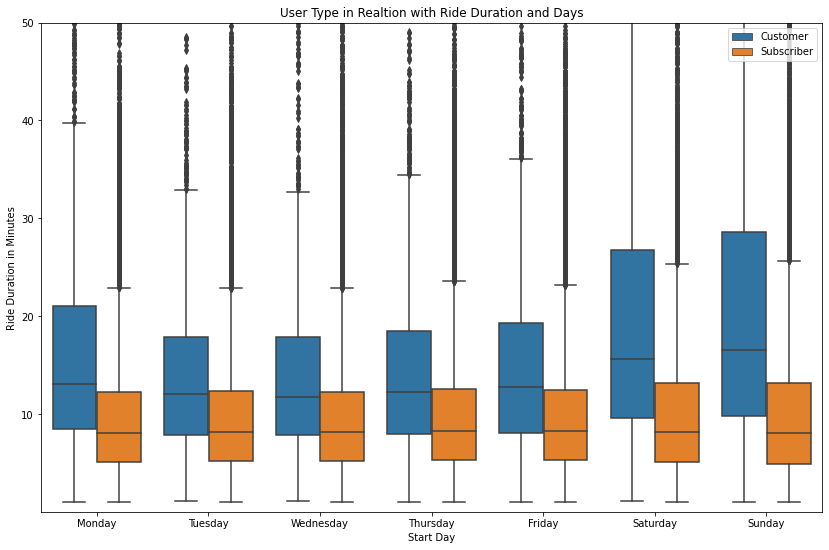

In [13]:
plt.figure(figsize = [14,9])
sb.boxplot(data = df, x='stt_day', y='duration_minute', hue='user_type', order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"] );
plt.ylim(0.01,50);
plt.xlabel('Start Day');
plt.ylabel('Ride Duration in Minutes');
plt.title('User Type in Realtion with Ride Duration and Days');
plt.legend(loc='upper right');

This boxplot shows that subscriber have a consistent usage in terms of days and duration of bikes in contrast with customers. Customers have longer durations during the weekends.

## Members Service Usage based on Their Age Groups
> Members with most trips are aged between 30 and 35 years old, which can be explained by the fact that this age group is the most present in the dataframe with a peak for the 34 years old.

> The trips counts and durations is affected by the members' ages as follows:
>> * The longest ride belongs to people identified as other aged between 30 and 40 followed by those aged above 50 years old, in the same gender type.
>> * Memebers above 40, in almost all gender types, have longer trip duration than younger members.
>> * Female members in 50 - 60 age groups have longer rides than other younger females and all males.

In [14]:
df['member_age'] = 2022-df['member_birth_year']

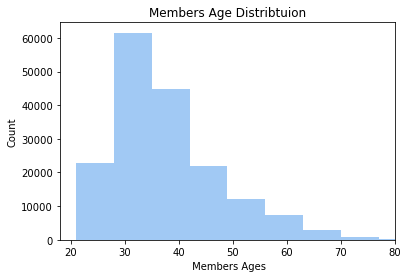

In [21]:
bins = np.arange(0, df['member_age'].max()+7, 7)
plt.xlim(18, 80)
create_histogramme (data = df, x = 'member_age', bins = bins, color = color[0], title = 'Members Age Distribtuion', xlabel = ' Members Ages' , ylabel = 'Count')

The histogram shows a peak between 30 and 35 years old. And according to the previous chart, we can conclude that largest group of members are aged 34 years old. Therfore, we can state that the majority of the members use the bikes as a necessary transportation mean (work, for instance).

In [16]:
# Create the age groups
df['age_groups'] = df['member_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else '60+' if x>60
                                                  else x);
df.age_groups.value_counts()

30 - 40    76788
20 - 30    48176
40 - 50    30207
50 - 60    14000
60+         5781
Name: age_groups, dtype: int64

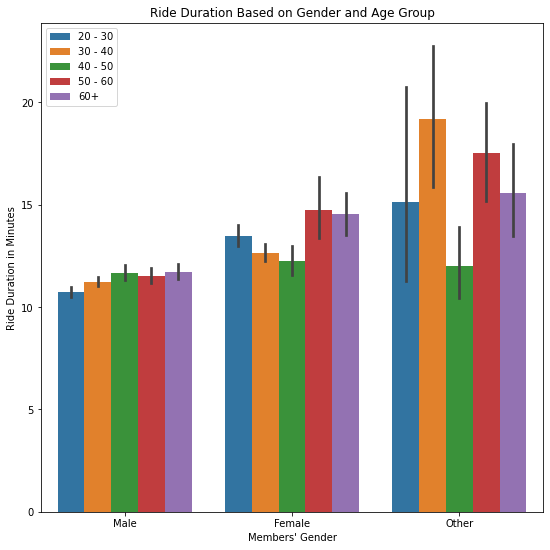

In [17]:
plt.figure(figsize = [9, 9])

ax = sb.barplot(x='member_gender', y = 'duration_minute', hue='age_groups', data=df.sort_values(by= 'age_groups'))
plt.title('Ride Duration Based on Gender and Age Group')
plt.xlabel("Members' Gender")
plt.ylabel('Ride Duration in Minutes')
leg = ax.legend()

The barplot shows that people, identified as other gender, aged in the 30-40 age range have the longest bike rides reaching 20 minutes. Additionally, people aged between 50 and 60 have long bike rides more than younger people in all gender.

In [22]:
!jupyter nbconvert Part_II_Slide_Deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_Slide_Deck.ipynb to slides
[NbConvertApp] Writing 676742 bytes to Part_II_Slide_Deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\hnasr\Downloads\Anaconda\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\hnasr\Downloads\Anaconda\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\hnasr\Downloads\Anaconda\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\hnasr\Downloads\Anaconda\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\hnasr\Downloads\Anaconda\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.conver